In [1]:
import sys
sys.path.append('../src')

In [9]:
%matplotlib inline
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
from torch.utils.data.dataset import Dataset
from torchvision import transforms
from FishDataset import FishDataset
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
fish_dataset = FishDataset('../data')

In [4]:
unet = torch.load('../models/unet.pt')

In [5]:
def extract_fish(image, model):
    original_shape = image.size
    image = image.resize((128, 128))
    inputs = Variable(transforms.ToTensor()(image).unsqueeze(0)).cuda()
    outputs = model(inputs).round().squeeze(0).cpu().data
    mask = transforms.ToPILImage()(outputs)
    background = Image.new('RGB', (128, 128), color='white')
    
    return Image.composite(image, background, mask).resize(original_shape)

In [6]:
# use the same random_sate to get the same validation set from traning
_, test_indices = train_test_split(np.arange(len(fish_dataset)), test_size=0.2, random_state=42)

In [7]:
images = [fish_dataset[i][0] for i in test_indices[:10]]

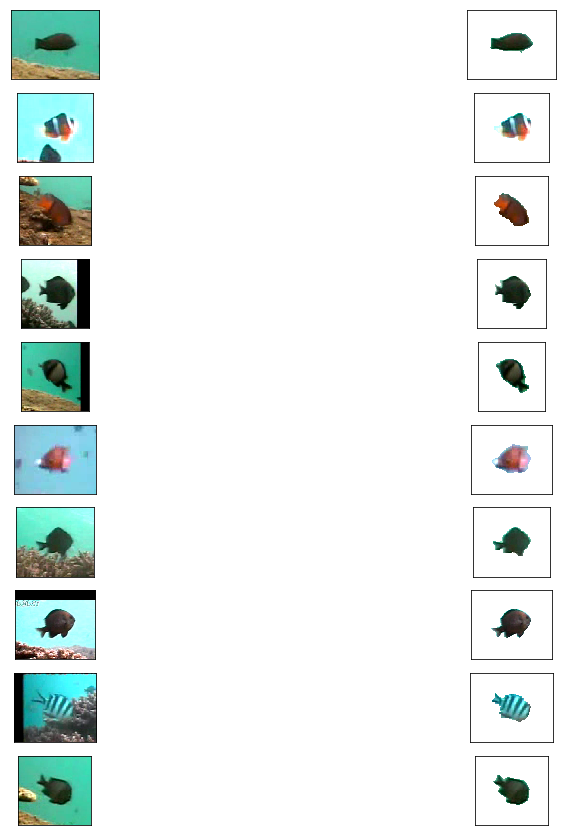

In [8]:
fig, axis = plt.subplots(10, 2, figsize=(15,15))
for image, (ax1, ax2) in zip(images, axis):
    fish = extract_fish(image, unet)
    ax1.imshow(image)
    ax2.imshow(fish)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.set_xticks([])
    ax2.set_yticks([])
plt.show()